In [7]:
### This noteboook is used for dealing with problem in ContiguousSNP
import sys
import os
import zipfile

## import function from python_scripts
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
from python_scripts.gene_level_MoM import * 
from python_scripts.pairwise_product_var_calculation import * 
from python_scripts.visualization import * 
from python_scripts.weight_function import * 

In [8]:
###unzip file
zip_files = [
    "../test_data/chr1_Contiguous1KSNP.zip",
    "../test_data/chr1_Contiguous1KSNP_LDpruned_08.zip",
    "../test_data/chr1_Contiguous1KSNP_LDpruned_09.zip",
    "../test_data/chr1_Random1KSNP.zip"
]
for zf in zip_files:
    with zipfile.ZipFile(zf, "r") as z:
        z.extractall("test_data")   
    print(f"Unzipped: {zf}")
##read data  
##Random snp
RandomSNP = pd.read_csv("test_data/chr1_Random1KSNP.raw", sep=r'\s+')
RandomSNP = RandomSNP.iloc[:, 6:].to_numpy()
##Contiguous snp
ContiguousSNP = pd.read_csv("test_data/chr1_Contiguous1KSNP.raw", sep=r'\s+')
ContiguousSNP = ContiguousSNP.iloc[:, 6:].to_numpy()

##Contiguous snp_LDpruned_08
ContiguousSNP_LDpruned_08 = pd.read_csv("test_data/chr1_Contiguous1KSNP_LDpruned_08.raw", sep=r'\s+')
ContiguousSNP_LDpruned_08 = ContiguousSNP_LDpruned_08.iloc[:, 6:].to_numpy()

##Contiguous snp_LDpruned_09
ContiguousSNP_LDpruned_09 = pd.read_csv("test_data/chr1_Contiguous1KSNP_LDpruned_09.raw", sep=r'\s+')
ContiguousSNP_LDpruned_09 = ContiguousSNP_LDpruned_09.iloc[:, 6:].to_numpy()

Unzipped: ../test_data/chr1_Contiguous1KSNP.zip
Unzipped: ../test_data/chr1_Contiguous1KSNP_LDpruned_08.zip
Unzipped: ../test_data/chr1_Contiguous1KSNP_LDpruned_09.zip
Unzipped: ../test_data/chr1_Random1KSNP.zip


In [9]:
### experiment1: can we use pi pj and cov_sigma ij  to represent pairwise product variance (var zizj).
### we simulate two SNP with AF pi pj and their cov sigmaij, if the formula apply to these, they should apply to all SNPs in real data

# the parameter
n = 2
p1 = 0.3
p2 = 0.4
sigmaij = 0.2
c = sigmaij / n  
p11 = p1 * p2 + c
p10 = p1 - p11
p01 = p2 - p11
p00 = 1 - p11 - p10 - p01

sizes = [1000,10000,100000,1000000,10000000]

for size in sizes:
     ### simulate two SNPs
     probs = np.array([p00, p01, p10, p11])
     codes = np.random.choice(4, size=(size, n), p=probs)
     
     X1 = ((codes == 2) | (codes == 3)).sum(axis=1)
     X2 = ((codes == 1) | (codes == 3)).sum(axis=1)
     X = np.column_stack((X1, X2))
     Z = (X - X.mean(axis=0)) / X.std(axis=0)
     var_zizj_formule= calculate_varZiZj(X)[0]
     empirical_var_zizj= np.var(Z[:,0]*Z[:,1])

     ### compare their result
     print(" ")
     print(f"Under the size of individual:{size}")
     print(f"The var(zizj) given by formule:{var_zizj_formule}")
     print(f"The empirical var(zizj):{empirical_var_zizj}")
     print(f"The relative error:{(var_zizj_formule - empirical_var_zizj) / empirical_var_zizj:.6f}")

print(" ")
print("With the increase of individual size, the var(zizj) given by formule will approach empirical var(zizj) ")

 
Under the size of individual:1000
The var(zizj) given by formule:1.0559247646939662
The empirical var(zizj):1.102972661034775
The relative error:-0.042656
 
Under the size of individual:10000
The var(zizj) given by formule:1.0785131967090857
The empirical var(zizj):1.069934454343539
The relative error:0.008018
 
Under the size of individual:100000
The var(zizj) given by formule:1.078382831962365
The empirical var(zizj):1.0869679018396778
The relative error:-0.007898
 
Under the size of individual:1000000
The var(zizj) given by formule:1.0794171939190287
The empirical var(zizj):1.077216694186235
The relative error:0.002043
 
Under the size of individual:10000000
The var(zizj) given by formule:1.0792923524184725
The empirical var(zizj):1.080306359364081
The relative error:-0.000939
 
With the increase of individual size, the var(zizj) given by formule will approach empirical var(zizj) 


------------------RandomSNP distribution-------------------


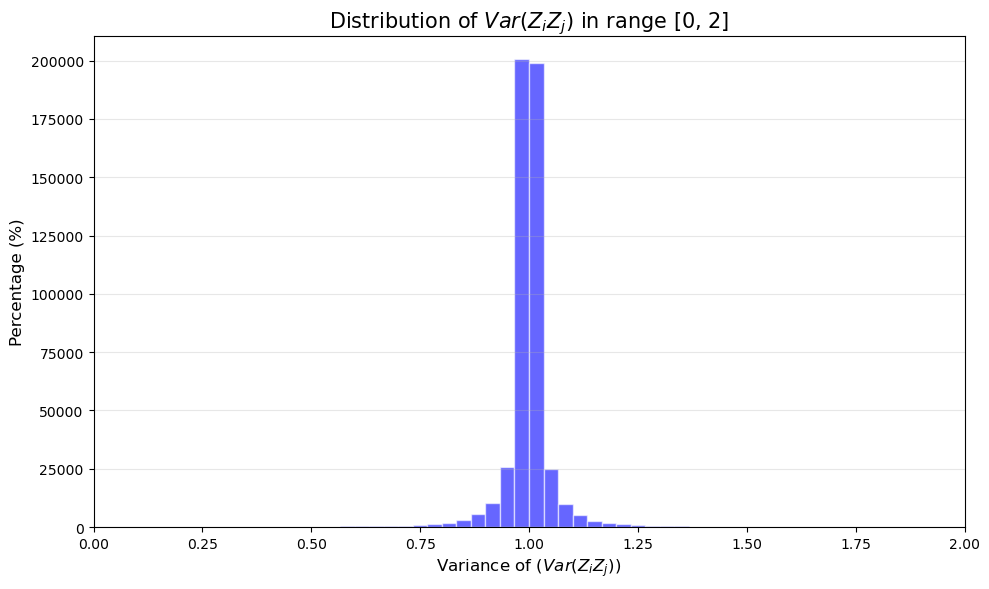

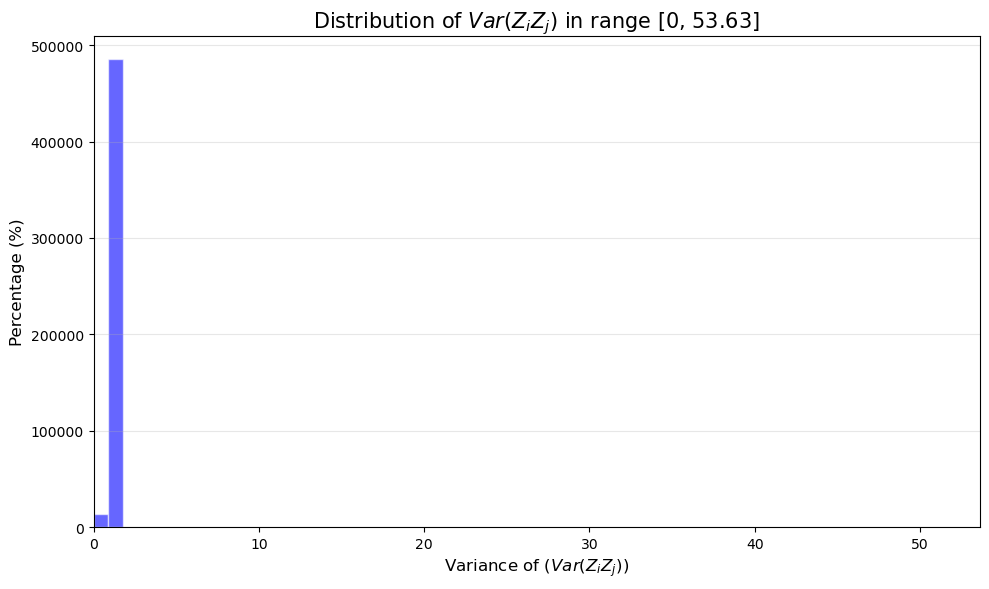

------------------ContiguousSNP distribution-------------------


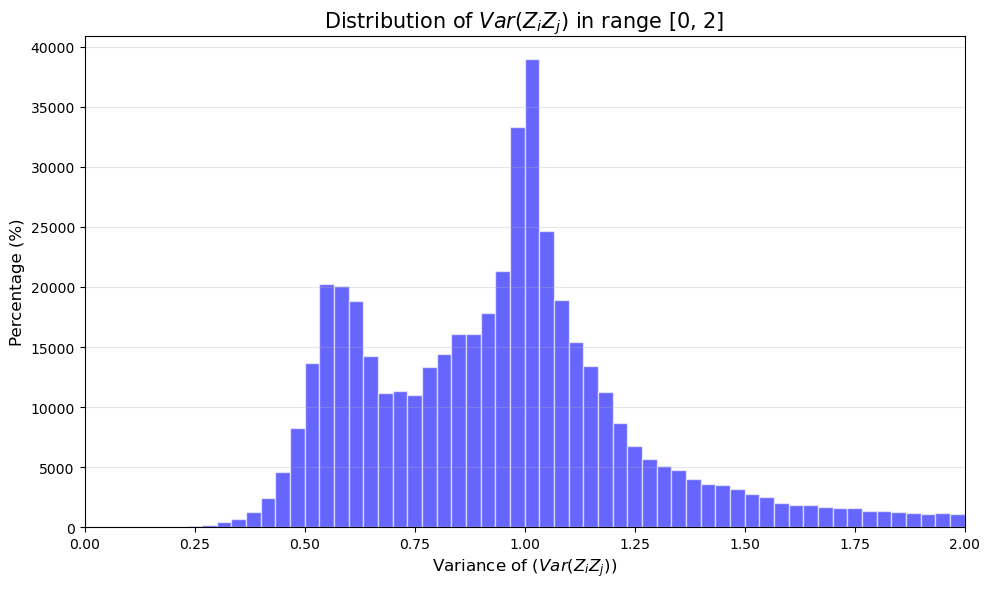

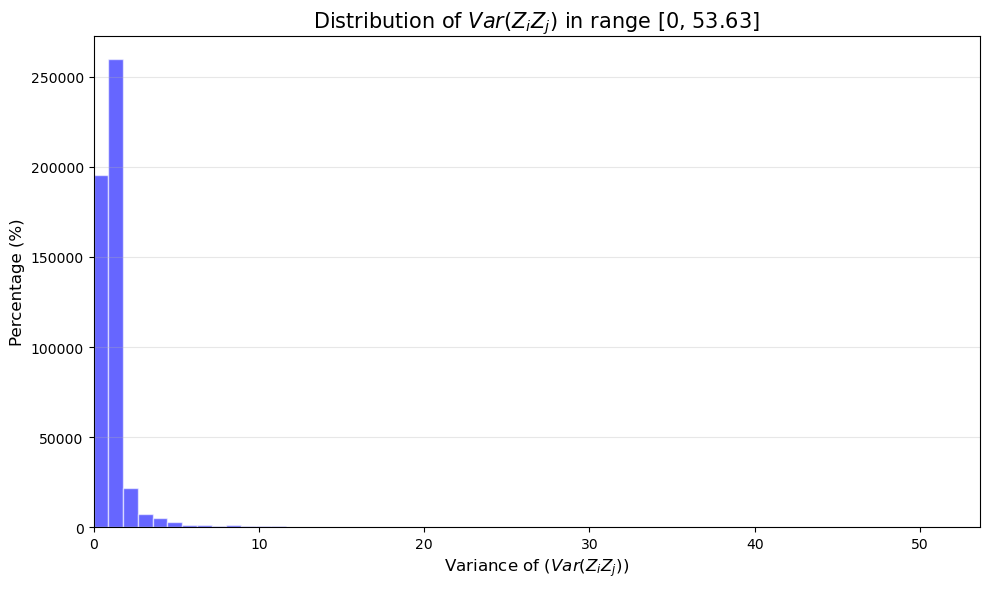

In [47]:
### experiment2: check the distibution of pairwise product variance (var zizj) in Random and contiguous SNPs
RandomSNP_varZiZj= calculate_varZiZj(RandomSNP)
ContiguousSNP_varZiZj= calculate_varZiZj(ContiguousSNP)

RandomSNP_varXiXj= calculate_varXiXj(RandomSNP)
ContiguousSNP_varXiXj= calculate_varXiXj(ContiguousSNP)

### draw the distribution
print("------------------RandomSNP distribution-------------------")
plot_distribution_varzizj(RandomSNP_varZiZj,0,2,60) ## pick variance with range 0 to 2 
plot_distribution_varzizj(RandomSNP_varZiZj,0,round(max(ContiguousSNP_varZiZj), 2),60)  ## draw the distriburion of all variance  
print("------------------ContiguousSNP distribution-------------------")
plot_distribution_varzizj(ContiguousSNP_varZiZj,0,2,60) ## pick variance with range 0 to 2 
plot_distribution_varzizj(ContiguousSNP_varZiZj,0,round(max(ContiguousSNP_varZiZj), 2),60) ## draw the distriburion of all variance

------------------RandomSNP case-------------------


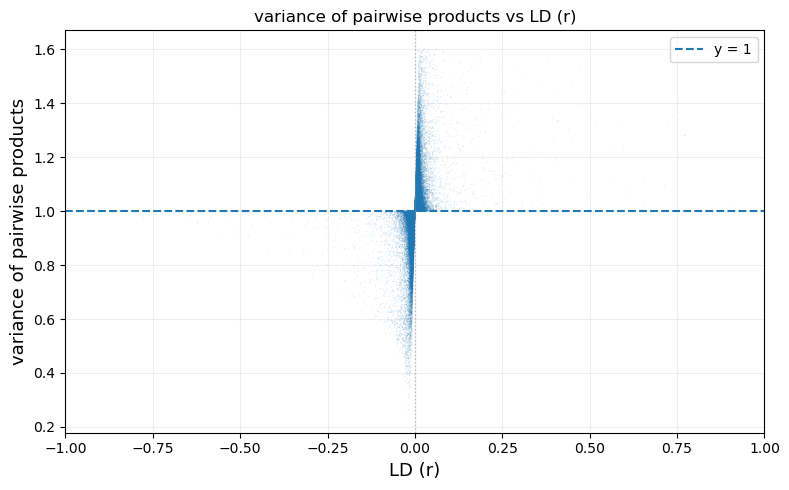

------------------ContiguousSNP case-------------------


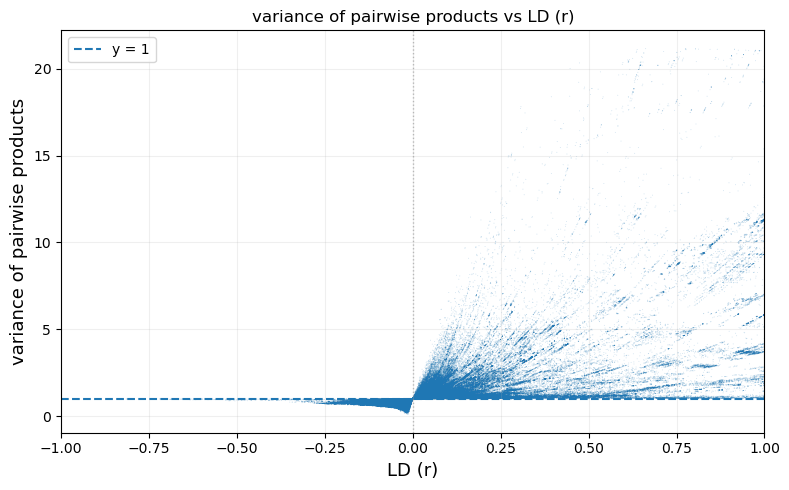

In [11]:
### experiment3: check the distibution of pairwise product variance (var zizj) against with LD (r)
def ld_vector(X):
    corr_matrix = np.corrcoef(X, rowvar=False)
    iu = np.triu_indices(X.shape[1], k=1)
    return corr_matrix[iu]


print("------------------RandomSNP case-------------------")
ld_RandomSNP =  ld_vector(RandomSNP)
plot_var_pairwise_products_against_ld(RandomSNP_varZiZj, ld_RandomSNP, q=0.999, save_path=None)


print("------------------ContiguousSNP case-------------------")
ld_ContiguousSNP =  ld_vector(ContiguousSNP)
plot_var_pairwise_products_against_ld(ContiguousSNP_varZiZj, ld_ContiguousSNP, q=0.999, save_path=None)

------------------ContiguousSNP case witn LD-pruning (r2) threshold 0.9-------------------


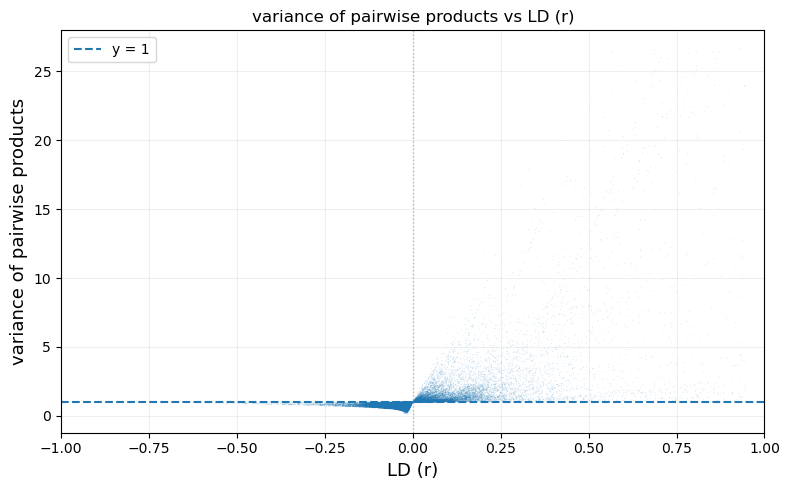

------------------ContiguousSNP case witn LD-pruning (r2) threshold 0.8-------------------


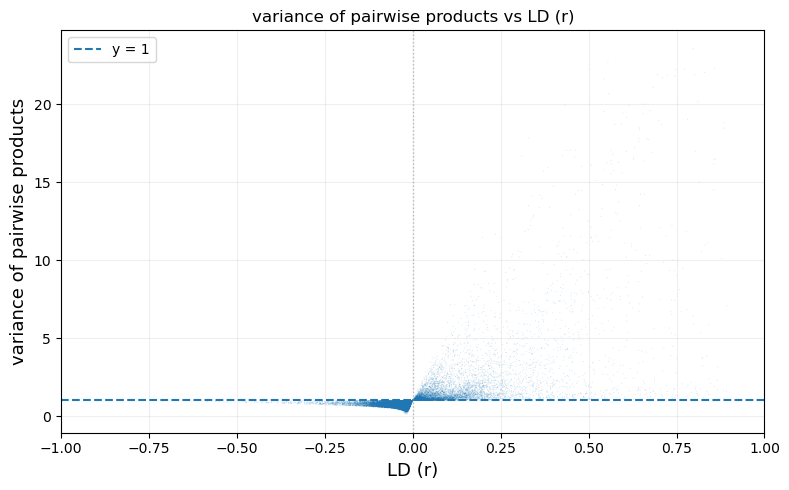

In [46]:
### experiment4: whether the LD pruned SNP can change the situation.
ContiguousSNP_varZiZj_LDpruned_08= calculate_varZiZj(ContiguousSNP_LDpruned_08)
ContiguousSNP_varZiZj_LDpruned_09= calculate_varZiZj(ContiguousSNP_LDpruned_09)

print("------------------ContiguousSNP case witn LD-pruning (r2) threshold 0.9-------------------")
ld_ContiguousSNP_LDpruned_09 =  ld_vector(ContiguousSNP_LDpruned_09)
plot_var_pairwise_products_against_ld(ContiguousSNP_varZiZj_LDpruned_09, ld_ContiguousSNP_LDpruned_09, q=0.999, save_path=None)

print("------------------ContiguousSNP case witn LD-pruning (r2) threshold 0.8-------------------")
ld_ContiguousSNP_LDpruned_08 =  ld_vector(ContiguousSNP_LDpruned_08)
plot_var_pairwise_products_against_ld(ContiguousSNP_varZiZj_LDpruned_08, ld_ContiguousSNP_LDpruned_08, q=0.999, save_path=None)


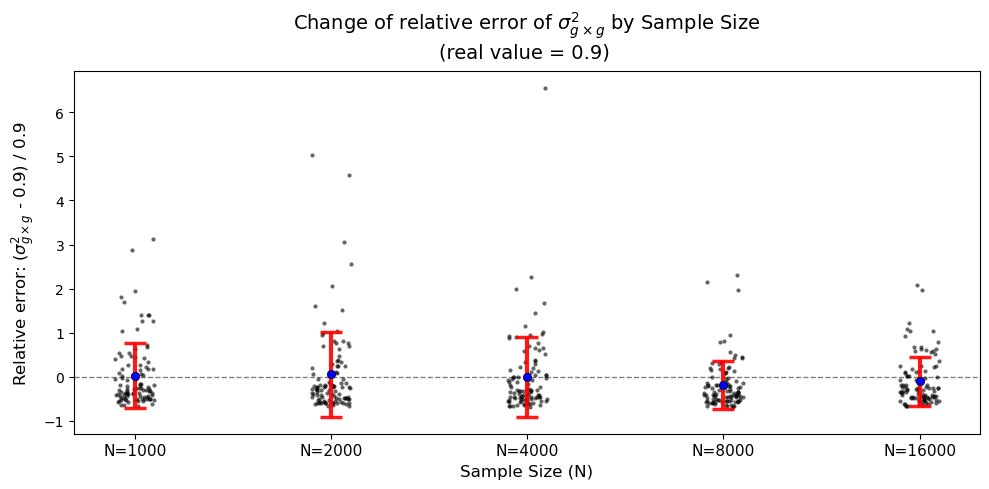

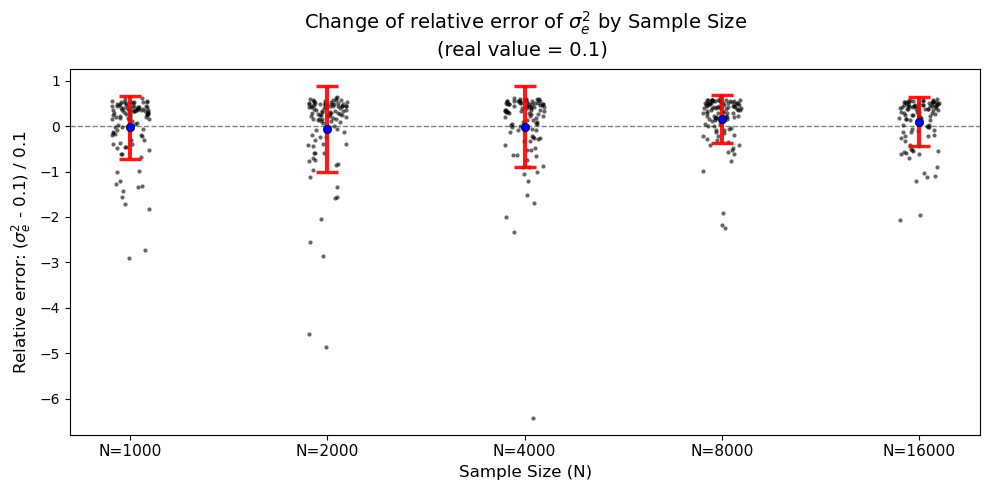

In [45]:
### experiment5: If we remove those highly correlated data pairs, can we achieve unbiased estimation?
#### visualise cluster result
individual_sizes = [1000,2000,4000,8000,16000]
result = read_MoM_results(individual_sizes,"../test_data/MoM_result_ContiguousSNP_after_pruning_09",294)
df_pruning_09 = [result[n] for n in individual_sizes]

plot_relative_error_accross_sample_size(
    *df_pruning_09, 
    basic_individual=1000, col_num=0, real_value=0.9
)

plot_relative_error_accross_sample_size(
    *df_pruning_09, 
    basic_individual=1000, col_num=1, real_value=0.1
)